In [1]:
import numpy as np  #linear algebra
import matplotlib.pyplot as plt # data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd # data visualization
import seaborn as sns # statistical data visualization

In [2]:
# ignore warnings

import warnings
warnings.filterwarnings('ignore')

In [3]:
# load and preview data
df=pd.read_csv(r'C:\Drive E\FSDS AND AI\Date wise files\22102024\Breast_cancer_data.csv')
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [4]:
# view summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [5]:
# check the distribution of the target variable
df['diagnosis'].value_counts()

diagnosis
1    357
0    212
Name: count, dtype: int64

In [6]:
X=df[['mean_radius','mean_texture','mean_perimeter','mean_area','mean_smoothness']]
y=df['diagnosis']

In [7]:
# split the dataset into the training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [8]:
# build the lightgbm model
import lightgbm as lgb
clf=lgb.LGBMClassifier()
clf.fit(X_train,y_train)

[LightGBM] [Info] Number of positive: 249, number of negative: 149
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000417 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 665
[LightGBM] [Info] Number of data points in the train set: 398, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.625628 -> initscore=0.513507
[LightGBM] [Info] Start training from score 0.513507
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

LGBMClassifier()

In [9]:
# predict the results
y_pred=clf.predict(X_test)

In [10]:
# view accuracy
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,y_pred)
print('LightGBM Model accuracy score: {:.4f}'.format(acc))

LightGBM Model accuracy score: 0.9298


In [11]:
y_pred_train=clf.predict(X_train)

print('Training-set accuracy score: {:.4f}'.format(accuracy_score(y_pred_train,y_train)))

Training-set accuracy score: 1.0000


In [12]:
# print the scores on training and test set
print('Training set score: {:.4f}'.format(clf.score(X_train,y_train)))
print('Test set score: {:.4f}'.format(clf.score(X_test,y_test)))

Training set score: 1.0000
Test set score: 0.9298


In [13]:
# view confusion-matrix
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print('Confusion matrix\n\n',cm)
print('\n True Positives(TP) = ',cm[0,0])
print('\n True Negatives(TN) = ',cm[1,1])
print('\n False Positives(FP) = ',cm[0,1])
print('\n False Negatives(FN) = ',cm[1,0])

Confusion matrix

 [[ 55   8]
 [  4 104]]

 True Positives(TP) =  55

 True Negatives(TN) =  104

 False Positives(FP) =  8

 False Negatives(FN) =  4


<Axes: >

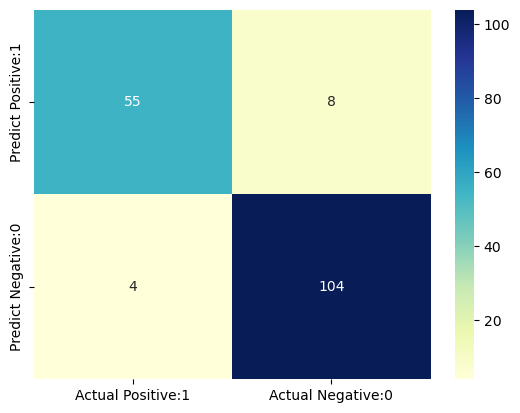

In [14]:
# visualize confusion matrix with seaborn heatmap
cm_matrix=pd.DataFrame(data=cm,columns=['Actual Positive:1', 'Actual Negative:0'],
                      index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix,annot=True,fmt='d',cmap='YlGnBu')

In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90        63
           1       0.93      0.96      0.95       108

    accuracy                           0.93       171
   macro avg       0.93      0.92      0.92       171
weighted avg       0.93      0.93      0.93       171

